In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
import pickle
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("student-mat.csv", sep=";")
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
data.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


In [4]:
data.dropna(axis=0,inplace=True)

In [5]:
y=data['G3'].copy()
x=data.drop(["G3"], axis=1)

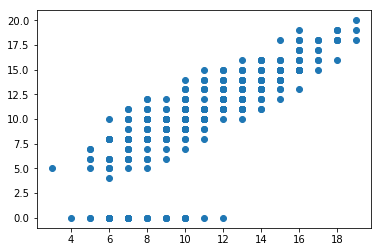

In [6]:
plt.scatter(x['G1'],y)

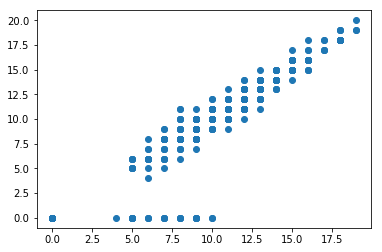

In [7]:
plt.scatter(x['G2'],y)

In [8]:
scale = StandardScaler()
x = scale.fit_transform(x).copy()

C:\Users\Chinnu\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Chinnu\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [9]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.1)

In [10]:
linear = linear_model.LinearRegression()

In [11]:
linear.fit(x_train, y_train)
acc = linear.score(x_test, y_test) 

In [12]:
print(acc)

0.8586025159411683


In [13]:
with open ("model1.pkl","wb") as f:
    pickle.dump(linear,f)

In [14]:
with open ("model1.pkl","rb") as f1:
    linear = pickle.load(f1)
    acc = linear.score(x_test, y_test) 
    print(acc)

0.8586025159411683


In [15]:
for p,q in zip(linear.predict(x_test),y_test):
    print(f'Predicted: {p} Actual: {q}')

Predicted: 18.370869018119198 Actual: 18
Predicted: 14.41784362565644 Actual: 14
Predicted: 8.730760931616523 Actual: 10
Predicted: 13.077654844706604 Actual: 13
Predicted: 18.504781414166416 Actual: 19
Predicted: 16.367848223008842 Actual: 16
Predicted: 6.920455138178336 Actual: 7
Predicted: 10.21007299220692 Actual: 11
Predicted: 9.618113039586898 Actual: 10
Predicted: 14.944883471330144 Actual: 15
Predicted: 7.989949437986682 Actual: 8
Predicted: 12.184350782142046 Actual: 12
Predicted: 15.171283337579599 Actual: 17
Predicted: 15.995632051523806 Actual: 18
Predicted: 10.603941512834243 Actual: 10
Predicted: 9.47041696191172 Actual: 10
Predicted: 12.63456661168107 Actual: 14
Predicted: 5.255518731948708 Actual: 6
Predicted: 14.966535820472433 Actual: 15
Predicted: 3.5359962722926808 Actual: 5
Predicted: 13.925535680232699 Actual: 14
Predicted: 8.490540443258556 Actual: 10
Predicted: 7.645290540465232 Actual: 7
Predicted: 11.971734597520552 Actual: 14
Predicted: 15.65955604132931 Actu